# K Means Clustering

This notebook will build K-means clustering from scratch, then implement it with the [Penguin dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris) dataset. We will then implement sklearn's principle component and k-means clustering algorithms on the same dataset.

#### Clustering

The clustering is a data mining technique that mainly deals with finding a structure or pattern in a collection of unlabeled data. It can automatically group the training data into categories with similar features.


### About the dataset

The dataset consists of 344 rows and 7 columns. There are three different species of penguins: Chinstrap, Adélie, and Gentoo penguins. The columns are:

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

### Tools

This notebook uses the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org/)
* [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA) in [sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html?highlight=decomposition#module-sklearn.decomposition)
* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) in [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

In [1]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sklearn imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Data Pre-Processing

Import data and check the dimensions.

In [2]:
# Import Penguins dataset
penguins = pd.read_csv("Data/penguins.csv")

# Remove the rows with NaN values from the dataset
penguins = penguins.dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
penguins.shape

(333, 7)

After removing the rows with NaN values from the dataset, the cleaned dataset has 333 rows and 7 columns.

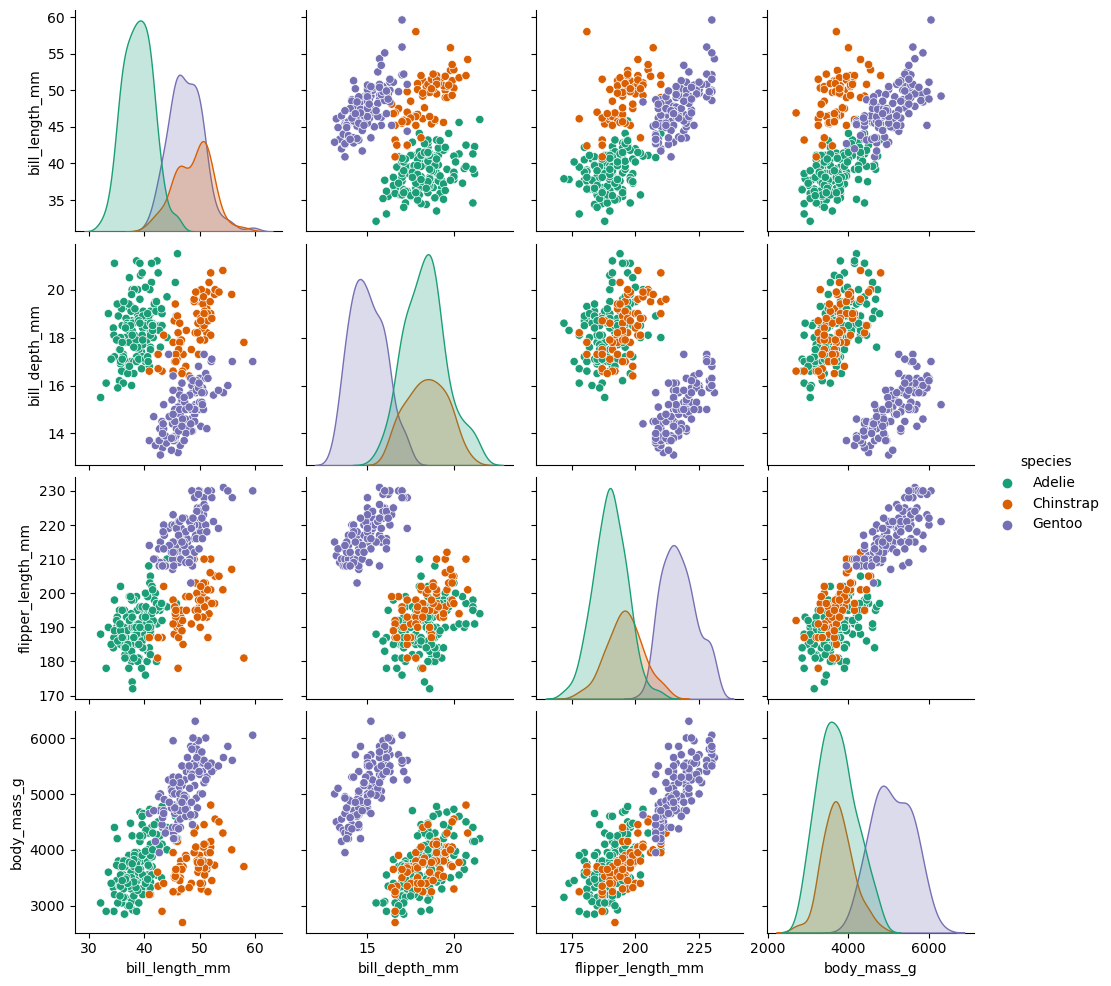

In [4]:
# Plot the scatterplot for each pair of features
sns.pairplot(penguins, hue='species', palette='Dark2')

There are some features pairs that separates the data into three categories. However, most features don't do a good job of separating the data into separate categories. 

Further, we transform the "body_mass_g". The feature "body_mass_g" to same scale as rest of the variables. This will be useful to calculate the distance between features. Further, transformation may improve the algorithm performance.

For transformation this notebook use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) tool in sklearn.preprocessing. It can directly standarlize all the features to the same scale.

In [5]:
# Extract out the features, and convert to numpy array
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [8]:
# Check the dimensions before PCA
X.shape

(333, 4)

To reduce the dimensions of the data we use PCA. PCA helps to identify the number of dimensions required to separate the three penguins species better without information loss. 

For a better comparison, I also plot the scatter plot for the last two features, "flipper_length_mm" vs. "body_mass_g".

In [9]:
# Extract out labels, and convert to numpy array
y = penguins[['species']].to_numpy()

# Change labels to numeric labels
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0

Text(0.5, 1.0, 'Flipper length vs. Body Mass (Before PCA)')

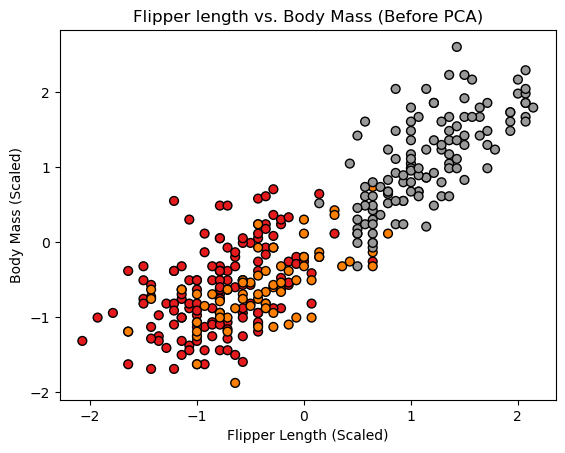

In [10]:
# Plot the scatterplot for the first two features
plt.scatter(X[:, 2], X[:, 3], c=y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.xlabel('Flipper Length (Scaled)')
plt.ylabel('Body Mass (Scaled)')
plt.title("Flipper length vs. Body Mass (Before PCA)")

##### Implement PCA using  [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) tool to reduce the dimension to only two.

In [11]:
# Use PCA to reduce the dimension of the dataset to only 2 dimentions
X_reduced = PCA(n_components = 2).fit_transform(X)

In [12]:
X_reduced.shape

(333, 2)

PCA reduces the dimension to 2.

Let's plot the projected points after PCA. 

Text(0.5, 1.0, 'Penguins Features After PCA')

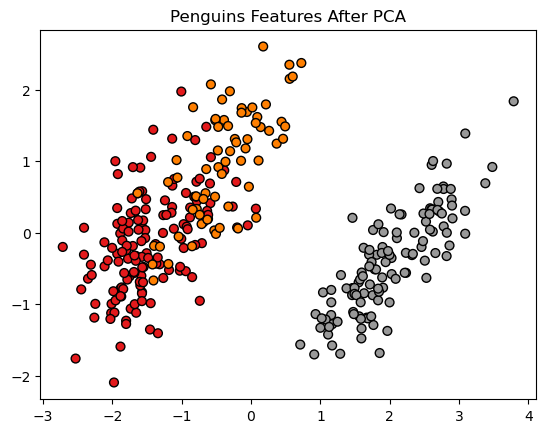

In [13]:
# Plot the features after PCA
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c = y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.title("Penguins Features After PCA")

Comparison of scatter plots before PCA and after PCA suggests that PCA separates the data well. 

However, seeing is not always believing. Let's build a K means clustering algorithm to investigate!

### Build the K Means Clustering Algorithm

#### Initiate K Centroids

Let's try K=2 on the original dataset before PCA.

In [14]:
# Randomly select K starting centroids
k = 2
C = []
for _ in range(k):
    i = np.random.randint(len(X))
    C.append(X[i, :])

In [15]:
# Check the dimension of the centroids
C

[array([ 2.18062708, -0.08384623,  1.93166154,  1.73250347]),
 array([-0.27338269,  1.79788309, -0.283462  ,  0.36435424])]

The randomly selected centroids have the same number of features (4 variables) as the original Penguins dataset.

##### Use Euclidean distance between  two points

In [16]:
# Define the distance function to calculate Euclidean distance between two points
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))

In [17]:
# Check the distance function between one of the first centroid and the first data point in the dataset
distance(C[0], X[0])

5.175599209748112

#### Define the Assignment Function


To estimate the distance from each data point to every centroid, and return the index of the nearest centroid.

In [18]:
# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

In [19]:
# Check the Assignment function on the first data point in the dataset
assignment(X[0], C)

1

Scatter plot to see the assignment for the first set of centroids.

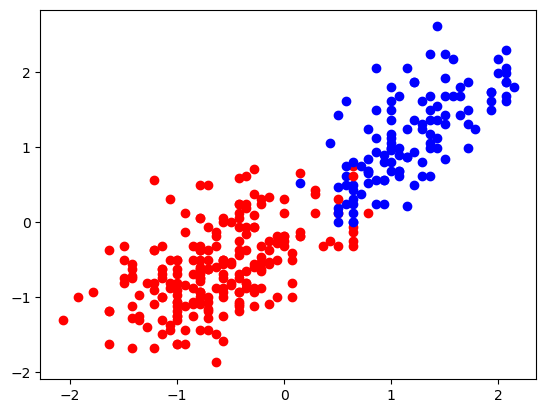

In [20]:
# Scatter plot to show the assignments
for x in X:
    
    # Mark the points assigned to the first cluster in blue
    if assignment(x, C) == 0:
        plt.scatter(x[2], x[3], color = "blue")
        
    # Mark the points assigned to the second cluster in red
    else:
        plt.scatter(x[2], x[3], color = "red")
        
plt.show()

Scatter plot above shows that few points are assigned to the second cluster. Group up the data points assigned to the same cluster, and update the centroids.

#### Group up the Assigned Points

To group up the points that assigned to the same cluster, we define a function names "make_classes".

In [21]:
# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    
    # Make the lists for every centroid separately
    for i in range(len(Centroids)):
        A[i] = []
    
    # Assigned every data points to the class list
    for x in data:
        A[assignment(x, Centroids)].append(x)
        
    return A

In [22]:
# Check the functions
A = make_classes(X, C)
A[0][:5]

[array([ 0.38590351, -2.01643309,  0.71691638,  0.36435424]),
 array([ 1.10013024, -0.43984907,  2.07457274,  1.85688067]),
 array([ 0.86205466, -1.55871515,  0.64546078,  0.30216564]),
 array([ 1.10013024, -0.99928211,  1.21710556,  1.85688067]),
 array([ 0.6606061 , -1.35528496,  1.00273877,  1.48374906])]

The printed 5 points in consistent to the blue points in the above scatter plot, suggesting that the "make_classes" function works well.

#### Update the Centroids

To update the centroids, calculate the mean points for every class and move the centroids to the mean points.

In [23]:
# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    
    # Calculate the mean points for every class
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))
        
    return new_Centroids

Let's check the function!

In [24]:
new_C = new_centroids(X, C)

In [25]:
C

[array([ 2.18062708, -0.08384623,  1.93166154,  1.73250347]),
 array([-0.27338269,  1.79788309, -0.283462  ,  0.36435424])]

In [26]:
new_C

[array([ 0.68767824, -1.08684554,  1.18293115,  1.13495213]),
 array([-0.36276604,  0.57333595, -0.62402331, -0.59871328])]

The centroids moved! And the new centroids fit our prediction made by looking the scatter plot above. They seem to be located at the center of the clusters.

Then we can put the functions for algorithm together and try for 4 iterations to see the changes of the assignment and have a intuitive impression on how the K Means algorithm work.

In [27]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

In [28]:
# Set K=3 and Try 4 iterations
k = 3
C0 = initialize_centroids(X, k = k)
C1 = new_centroids(X, C0)
C2 = new_centroids(X, C1)
C3 = new_centroids(X, C2)

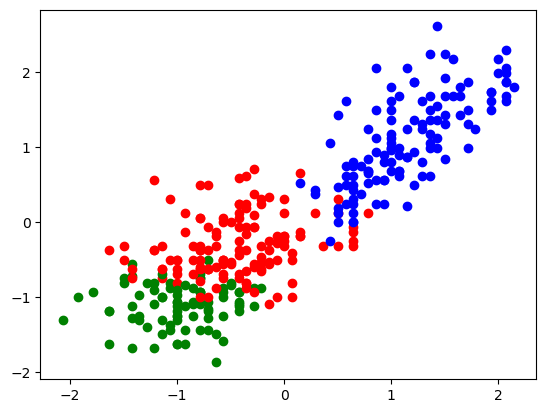

In [29]:
# Scatter plot for the first round assignment with the starting centroids
for x in X:
    if assignment(x, C0) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C0) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

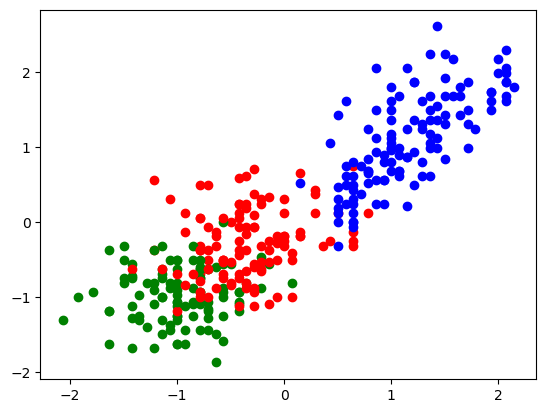

In [30]:
# Scatter plot for the second round assignment with the first updated centroids
for x in X:
    if assignment(x, C1) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C1) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

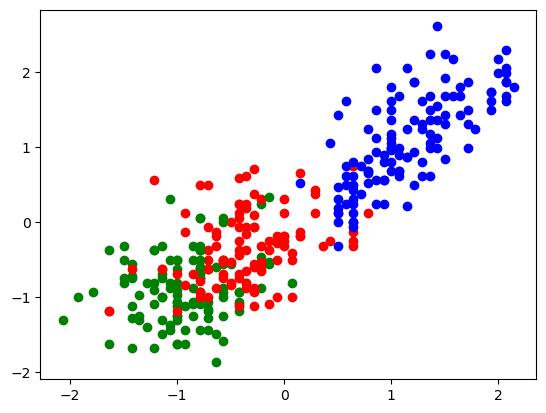

In [31]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C2) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C2) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

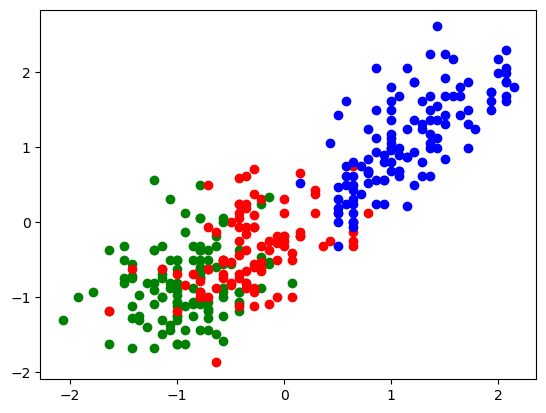

In [32]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C3) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C3) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

From the above scatter plots, it seems some data points which are near clusters boundary change color when centroids are updated.

#### Fitting and Prediction

Then we define the fitting function.

The stop criteria should be set. Once the max iteration is reached or the maximum of the distances between previous centroids and updated centroids is less than epsilon value, the iterations would stop.

We set the default max iteration at 100 times and the epsilon equal to $0.01$. 

In [33]:
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    
# try to achieve stpe 4 to find the centroids no longer move below:
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
        
    return C_new

#### Define Loss Function

In [34]:
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

So far, the basic of the K Means Clustering algorithm is built. Let's put all the functions together.

In [35]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [36]:
# Check the MSE after fitting
C = fit(X)
print(mse_classes(X, C))

186.00137519125875


The MSE values is acceptable! 

#### Choose the K Value by Elbow Method

To choose the optimal value k, this notebook use elbow method.

In [37]:
# Fit the model for K from 1 to 6
C1 = fit(X, k = 1)
C2 = fit(X, k = 2)
C3 = fit(X, k = 3)
C4 = fit(X, k = 4)
C5 = fit(X, k = 5)
C6 = fit(X, k = 6)
#C7 = fit(X, k = 7)
#C8 = fit(X, k = 8)
#C9 = fit(X, k = 9)
C = [C2, C3, C4, C5, C6]

Text(0.5, 1.0, 'K Values vs. MSE')

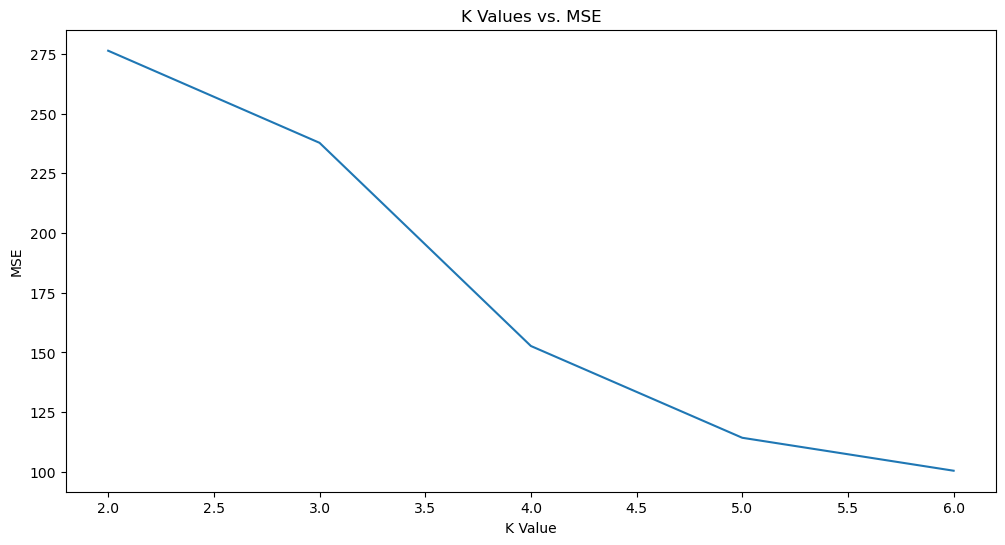

In [38]:
# Plot the loss function with K values
errors = [mse_classes(X, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 7)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

From the plot, K=3 is the elbow point, which is consistent to the original number of the labels in the Penguins dataset.

---

### Implement K Means Clustering after PCA



In [39]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X_reduced))
        Centroids.append(X_reduced[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X_reduced, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [40]:
# Check the MSE after fitting
C = fit(X_reduced)
print(mse_classes(X_reduced, C))

111.80620219597296


The MSE is smaller than the MSE of the model before PCA when K=3, suggesting that after PCA, the K Means Clustering algorithm perform better when K=3.

We can also use the elbow method to find the optimal K value.

In [41]:
# Fit the model for K from 1 to 8
C1 = fit(X_reduced, k = 1)
C2 = fit(X_reduced, k = 2)
C3 = fit(X_reduced, k = 3)
C4 = fit(X_reduced, k = 4)
C5 = fit(X_reduced, k = 5)
C6 = fit(X_reduced, k = 6)
C7 = fit(X_reduced, k = 7)
C8 = fit(X_reduced, k = 8)
#C9 = fit(X_reduced, k = 9)
C = [C2, C3, C4, C5, C6, C7, C8]

Text(0.5, 1.0, 'K Values vs. MSE')

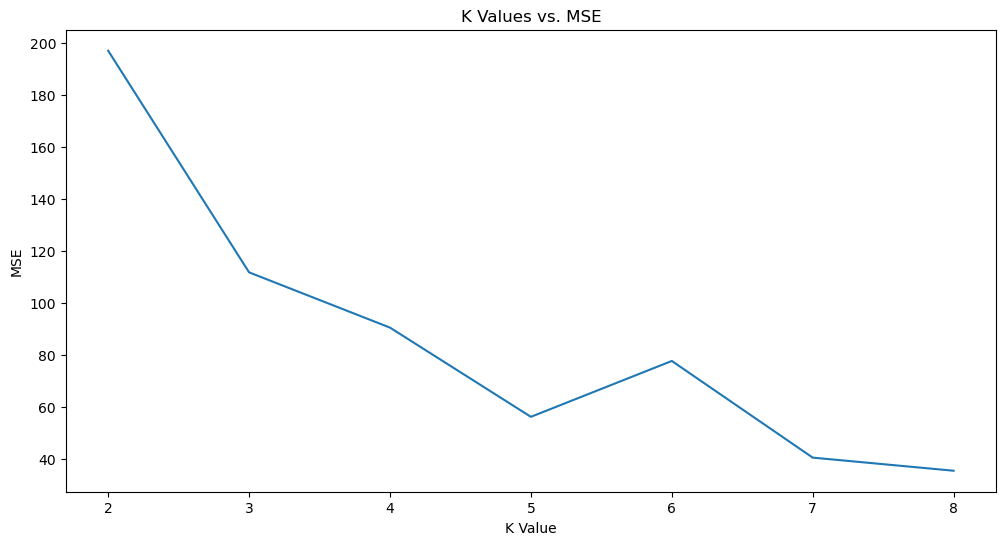

In [42]:
# Plot the loss function with K values
errors = [mse_classes(X_reduced, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 9)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

After PCA, the K=3 is also the elbow point, which is also consistent to the original number of the labels in the Penguins dataset. Also, K=6 is also an optimal value.

In the meantime, all the MSE values are smaller than the ones before PCA with the same K value. This also means, after PCA, the K Means Clustering algorithm perform better.

---

## Conclusion

* The K Means Clustering algorithm works well!
* Reducing dimension using PCA before the impleting K mean Clustering can improve the performance.
* Need to scale the data if the features are not in the same scale.